In [1]:
# OPTICS Clustering
# OPTICS (Ordering Points To Identify the Clustering Structure)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = dataset.iloc[:, [3, 4]].values

In [14]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)

In [15]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=7).fit(x)
clustering.labels_


array([-1,  4,  6,  4, -1,  4,  6, -1,  6,  4,  6, -1,  6,  4,  6,  4, -1,
        4, -1, -1, -1,  4,  6,  4,  6,  4, -1, -1, -1,  4,  6,  4,  6, -1,
       -1,  4, -1, -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,
       -1,  0,  0, -1,  0, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  2,  1,  3,  2,  3,  3, -1,  2,  2,  3,  2,  3,  2,
       -1, -1, -1,  3,  2,  2,  3,  2,  2, -1,  3,  2,  2,  2,  3, -1,  3,
       -1, -1, -1, -1,  8, -1,  7, -1,  8,  5,  7,  5,  7, -1,  7,  5,  8,
        5,  7,  5,  7,  5,  8, -1,  8,  5,  8, -1,  7, -1,  8,  5,  8,  5,
        7,  5,  8,  5,  7,  5,  7, -1, -1,  5,  8, -1,  8, -1,  8, -1, -1,
       -1,  8,  5,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [16]:
clustering

OPTICS(min_samples=7)

Estimated number of clusters: 9


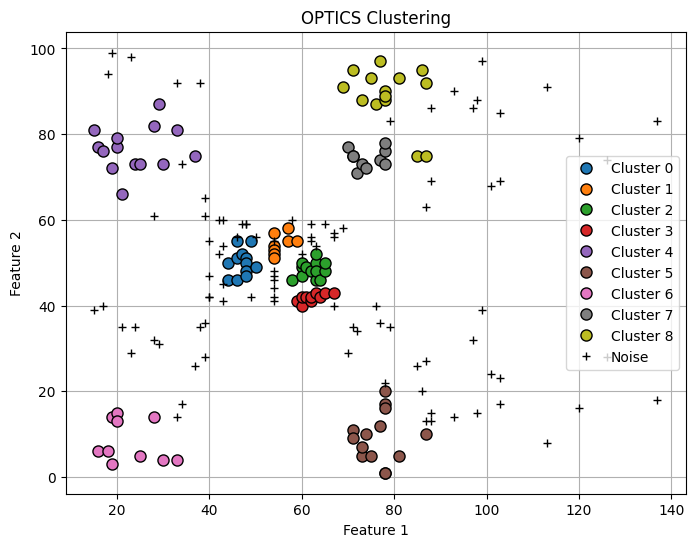

In [17]:
labels = clustering.labels_
#  Identify number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters}")

# Step 4: Plot clusters
plt.figure(figsize=(8, 6))

# Unique labels (including -1 for noise)
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    
    xy = x[class_member_mask]
    
    if k == -1:
        # Noise points in black
        plt.plot(xy[:, 0], xy[:, 1], 'k+', label='Noise')
    else:
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=8, label=f'Cluster {k}')
        
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
unsupervised=pd.DataFrame(dataset)

In [19]:
unsupervised['Cluster_group']=labels

In [20]:
unsupervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,6
3,4,Female,23,16,77,4
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


C:\Anaconda\anaconda3\envs\v_env1\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


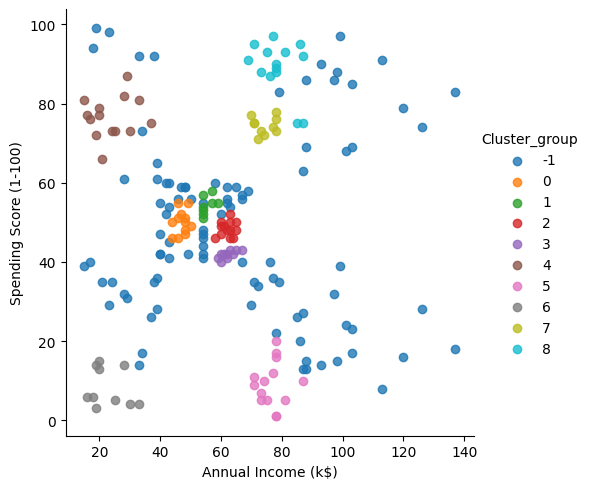

In [21]:
import seaborn as sns
facet = sns.lmplot(data=unsupervised, x=unsupervised.columns[3], y=unsupervised.columns[4], hue=unsupervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)

In [23]:
from sklearn.metrics import silhouette_score 
score = silhouette_score(x_scaled,labels)
print("Silhouette Score:" , score)

Silhouette Score: 0.0032239413229761204
